In [ ]:
# plot a histogram of a time series

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
series = pd.read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True,
squeeze=True)

In [4]:
series

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
              ..
1959-12-27    37
1959-12-28    52
1959-12-29    48
1959-12-30    55
1959-12-31    50
Name: Births, Length: 365, dtype: int64

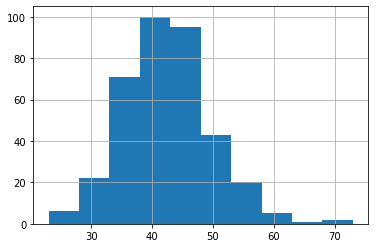

In [5]:
series.hist()
plt.show()

In [ ]:
# We clearly see the
# bell curve-like shape of the Gaussian distribution, perhaps with a longer right tail.

In [ ]:
# calculate statistics of partitioned time series data

In [6]:
X = series.values
split = int(len(X) / 2)


In [7]:
X1, X2 = X[0:split], X[split:]

In [8]:
mean1, mean2 = X1.mean(), X2.mean()

In [9]:
var1, var2 = X1.var(), X2.var()

In [10]:
print('mean1=%f, mean2=%f' % (mean1, mean2))

mean1=39.763736, mean2=44.185792


In [11]:
print('variance1=%f, variance2=%f' % (var1, var2))

variance1=49.213410, variance2=48.708651


In [12]:
# Running this example shows that the mean and variance values are different, but in the
# same ball-park.

In [13]:
series2 = pd.read_csv('AirPassengers.csv', header=0, index_col=0, parse_dates=True,
squeeze=True)

In [14]:
series2

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: Pessengers, Length: 144, dtype: int64

In [21]:
X = series2.values
split = int(len(X) / 2)

In [22]:
X1, X2 = X[0:split], X[split:]

In [23]:
mean1, mean2 = X1.mean(), X2.mean()

In [24]:
var1, var2 = X1.var(), X2.var()

In [25]:
print('mean1=%f, mean2=%f' % (mean1, mean2))

mean1=182.902778, mean2=377.694444


In [26]:
print('variance1=%f, variance2=%f' % (var1, var2))

variance1=2244.087770, variance2=7367.962191


In [ ]:
# Running the example, we can see the mean and variance look very different. We have a
# non-stationary time series.

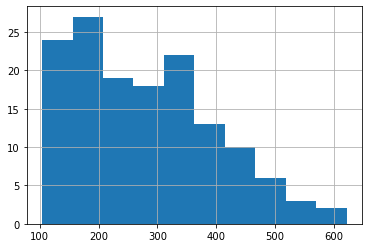

In [27]:
series2.hist()
plt.show()

In [ ]:
# Running the example shows that indeed the distribution of values does not look like a
# Gaussian, therefore the mean and variance values are less meaningful. This squashed distribution
# of the observations may be another indicator of a non-stationary time series.

In [ ]:
# Reviewing the plot of the time series again, we can see that there is an obvious seasonality
# component, and it looks like the seasonality component is growing. This may suggest an
# exponential growth from season to season. A log transform can be used to 
# flatten out exponential change back to a linear relationship.

In [29]:
import numpy as np

In [30]:
# AirPassengers
X = series2.values
X = np.log(X)

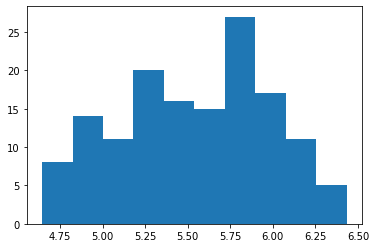

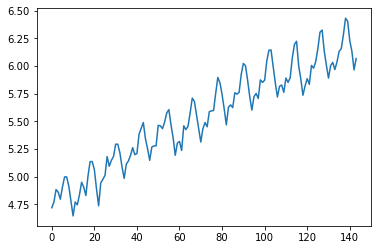

In [31]:
plt.hist(X)
plt.show()
plt.plot(X)
plt.show()

In [32]:
# Running the example, we can see the more familiar Gaussian-like or Uniform-like distribution
# of values.

In [ ]:
# We also create a line plot of the log transformed data and can see the exponential growth
# seems diminished

In [ ]:
# but we still have a trend and seasonal elements

In [ ]:
# calculate statistics of partitioned log transformed time series data

In [33]:
X = series2.values
X = np.log(X)
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()

In [34]:
print('mean1=%f, mean2=%f' % (mean1, mean2))

mean1=5.175146, mean2=5.909206


In [35]:
print('variance1=%f, variance2=%f' % (var1, var2))

variance1=0.068375, variance2=0.049264


In [ ]:
# calculate stationarity test of time series data

In [36]:
from statsmodels.tsa.stattools import adfuller

In [37]:
# Daily total female birth
X = series.values


In [38]:
result = adfuller(X)

In [40]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


In [ ]:
# since p value is < 0.05 dataset is Stationary

In [ ]:
# AirPassenger

In [41]:
X = series2.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [ ]:
# since p value is > 0.05 dataset is Non Stationary

In [ ]:
# calculate stationarity test of log transformed time series data

In [ ]:
# AirPassenger

In [43]:
X = series2.values
X = np.log(X)
result = adfuller(X)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.717017
p-value: 0.422367
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [ ]:
# Running the example shows a negative value for the test statistic. We can see that the value
# is larger than the critical values, again, meaning that we fail to reject the null hypothesis and in
# turn that the time series is non-stationary.